# Sample scripts to plot the pedestrian trajectories in the Metaforum landing

## Reference publication

   [Fluctuations around mean walking behaviors in diluted pedestrian flows](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.95.032316)

   by Alessandro Corbetta, Chung-min Lee, Roberto Benzi, Adrian Muntean, and Federico Toschi
   Phys. Rev. E 95, 032316 – Published 15 March 2017
   

This repository contains some sample scripts to work with the data.



**Paper abstract:**
Understanding and modeling the dynamics of pedestrian crowds can help with designing and increasing the safety of civil facilities. A key feature of a crowd is its intrinsic stochasticity, appearing even under very diluted conditions, due to the variability in individual behaviors. Individual stochasticity becomes even more important under densely crowded conditions, since it can be nonlinearly magnified and may lead to potentially dangerous collective behaviors. To understand quantitatively crowd stochasticity, we study the real-life dynamics of a large ensemble of pedestrians walking undisturbed, and we perform a statistical analysis of the fully resolved pedestrian trajectories obtained by a yearlong high-resolution measurement campaign. Our measurements have been carried out in a corridor of the Eindhoven University of Technology via a combination of Microsoft Kinect 3D range sensor and automatic head-tracking algorithms. The temporal homogeneity of our large database of trajectories allows us to robustly define and separate average walking behaviors from fluctuations parallel and orthogonal with respect to the average walking path. Fluctuations include rare events when individuals suddenly change their minds and invert their walking directions. Such tendency to invert direction has been poorly studied so far, even if it may have important implications on the functioning and safety of facilities. We propose a model for the dynamics of undisturbed pedestrians, based on stochastic differential equations, that provides a good agreement with our field observations, including the occurrence of rare events.



**Dataset DOI**

    10.4121/uuid:25289586-4fda-4931-8904-d63efe4aa0b8


## If you use the dataset please cite 

**this publication**
```
@article{PhysRevE.95.032316,
  title = {Fluctuations around mean walking behaviors in diluted pedestrian flows},
  author = {Corbetta, Alessandro and Lee, Chung-min and Benzi, Roberto and Muntean, Adrian and Toschi, Federico},
  journal = {Phys. Rev. E},
  volume = {95},
  issue = {3},
  pages = {032316},
  numpages = {9},
  year = {2017},
  month = {Mar},
  publisher = {American Physical Society},
  doi = {10.1103/PhysRevE.95.032316},
  url = {https://link.aps.org/doi/10.1103/PhysRevE.95.032316}
}
```
**as well as the dataset ** (`10.4121/uuid:25289586-4fda-4931-8904-d63efe4aa0b8`)

In [35]:
%pylab inline 
import pandas as pd
import MF_domain_related as MFplot

%load_ext autoreload 
%autoreload 2

from matplotlib import rc
rc('text', usetex=True)

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/acorbe/anaconda/envs/kinectML/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [36]:
## load the dataset **(soon available from the 4TU)**
## download link soon available

left_to_right = pd.read_csv('left-to-right.ssv',delimiter=' ',prefix=True)
right_to_left = pd.read_csv('right-to-left.ssv',delimiter=' ',prefix=True)

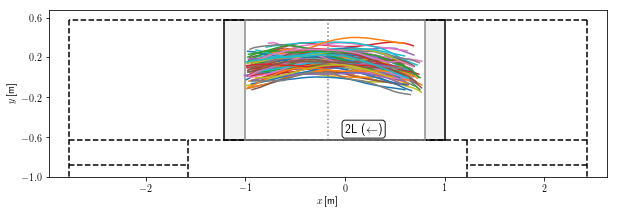

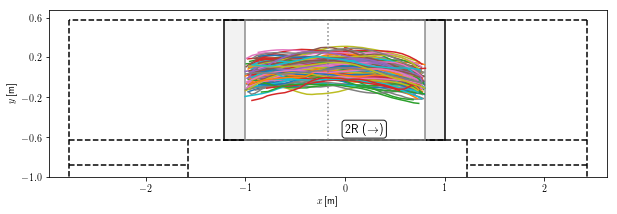

In [37]:
## plotting random trajectories

plt.figure(figsize=(10,10))
with MFplot.Domain_plotter_cm(just_domain = False
                             , annotate_direction = '2L'):
    _ = right_to_left[right_to_left.Pid < 500].groupby('Pid').apply(lambda x : plt.plot(x.X_SG , x.Y_SG))
    
    
plt.figure(figsize=(10,10))
with MFplot.Domain_plotter_cm(just_domain = False
                             , annotate_direction = '2R'):
    _ = left_to_right[left_to_right.Pid < 500].groupby('Pid').apply(lambda x : plt.plot(x.X_SG , x.Y_SG))

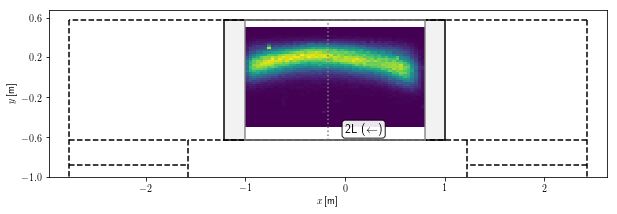

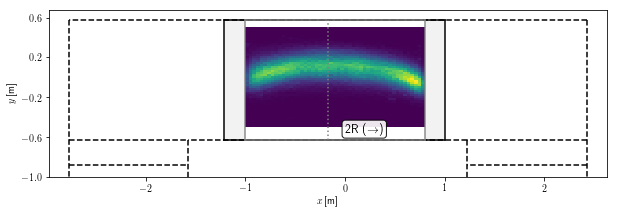

In [38]:
## plotting heatmaps

bins = (
    np.linspace(-1,.8,50)
    , np.linspace(-.5,.5,50)
)

plt.figure(figsize=(10,10))
with MFplot.Domain_plotter_cm(just_domain = False
                             , annotate_direction = '2L'):
    _ = plt.hist2d(right_to_left.X_SG,right_to_left.Y_SG,bins=bins)
   
    
    
plt.figure(figsize=(10,10))
with MFplot.Domain_plotter_cm(just_domain = False
                             , annotate_direction = '2R'):
    _ = plt.hist2d(left_to_right.X_SG,left_to_right.Y_SG,bins=bins)
    

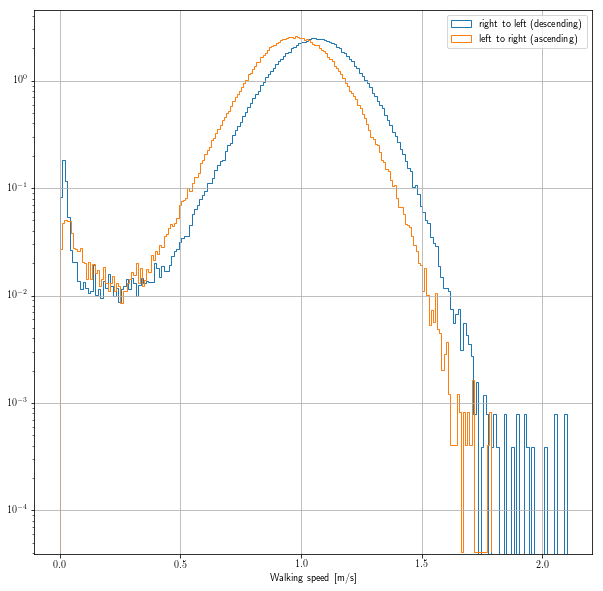

In [39]:
## Walking speed pdf

compute_speed = lambda df: df.eval('(U_SG**2+V_SG**2)**.5')

right_to_left['speed'] = compute_speed(right_to_left)
left_to_right['speed'] = compute_speed(left_to_right)


params = {
    "bins" : 200
    , "log" : True
    , "histtype" : "step"
    , "normed" : True
}


plt.figure(figsize=(10,10))
_ = right_to_left['speed'].hist(**params)
_ = left_to_right['speed'].hist(**params)
plt.xlabel('Walking speed [m/s]')
plt.legend(["right to left (descending)","left to right (ascending)"])